In [1]:
# import libraries
import numpy as np
import pandas as pd
import pysindy as ps
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
from dataPrep import DataPreparation

In [3]:
drivingProfile = pd.read_csv('./parameter.csv')
data = pd.read_csv('./SLC/SLC_input.csv')

In [4]:
data.head()

,time,Drv_DeltaSteer,Veh_Vx
0,0.000,0.0,30.000000
1,0.005,0.0,29.999664
2,0.010,0.0,29.998813
3,0.015,0.0,29.997596
4,0.020,0.0,29.996121


In [5]:
dp = DataPreparation(drivingProfile)

In [6]:
Time = data['time'].to_numpy()
deltaSteer = data['Drv_DeltaSteer'].to_numpy()
Vx = data['Veh_Vx'].to_numpy()

In [7]:
[time, output] = dp.getOutput(Time, deltaSteer, Vx)
[time, inputs] = dp.getInput(Time, deltaSteer, Vx)
[time, states] = dp.getStates(Time, deltaSteer, Vx)
output = np.transpose(np.array(output))
inputs = np.transpose(np.array(inputs))
states = np.transpose(np.array(states))
time = np.array(time)

In [8]:
print(inputs[:,0].min(), inputs[:,0].max())

-6987.1714830972005 6514.658733236362


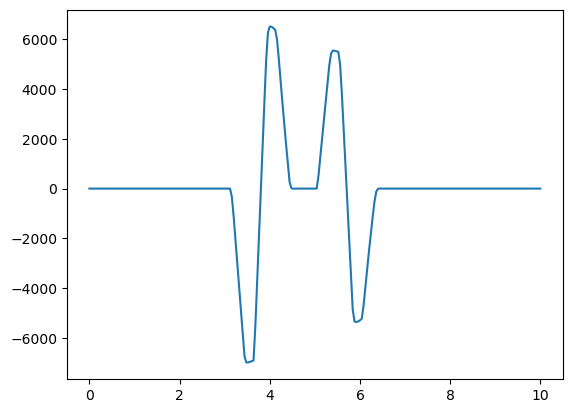

In [10]:
# plt.plot(time, output[0])
plt.plot(time, np.transpose(inputs)[0])
plt.show()
# plt.plot(time, output[1])
# plt.plot(time, input[1])

# Modelling

------------------------

In [20]:
feature_lib = ps.PolynomialLibrary(degree=3, include_bias=True)
parameter_lib = ps.CustomLibrary(library_functions=[lambda x:x, lambda x:x, lambda x:1/x], function_names=[lambda x:x, lambda x:x, lambda x:x+'^-1'],include_bias=True)

lib = ps.ParameterizedLibrary(
    feature_library=feature_lib,
    parameter_library=parameter_lib,
    num_features=2,
    num_parameters=2,
)

opt = ps.STLSQ(normalize_columns=False)
model = ps.SINDy(
    feature_library=lib, optimizer=opt, feature_names=["x1", "x2", "u1", "u2"], discrete_time=True
)

model.fit(x=states_scaled, u=inputs_scaled)
model.print()

C:\Users\adity\AppData\Roaming\Python\Python310\site-packages\pysindy\utils\axes.py:83: RuntimeWarning: divide by zero encountered in divide
  results = super().__array_ufunc__(ufunc, method, *args, **kwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').